# **[ 7주차 멘토멘티 ]** 
> - 기본적인 순환 신경망
- 순환 신경망 보완(Callback, Regularization)
- 영화 리뷰 감성분석(LSTM, Conv1D)
## 1. 기본적인 순환신경망

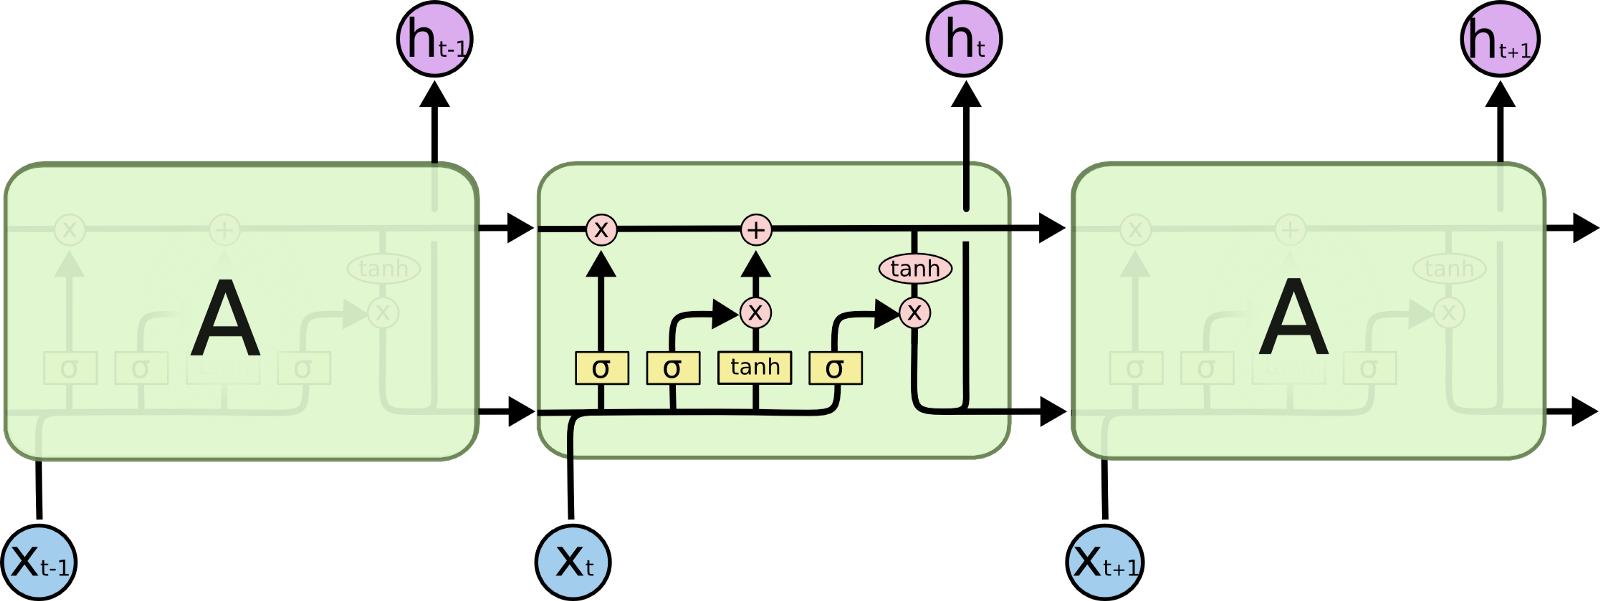

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
# array 형태로 넣어주기
x = np.array([[1,2,3], [2,3,4], [3,4,5], [4,5,6]])
y = np.array([4,5,6,7])
print(x.shape, y.shape)

(4, 3) (4,)


In [3]:
# reshape
x = x.reshape((x.shape[0], x.shape[1],1)) # 4*3*1 로 reshape

In [4]:
x.shape

(4, 3, 1)

In [5]:
model = Sequential()
model.add(LSTM(10, activation='tanh', input_shape=(3,1))) # input shape(열, 몇개씩 잘라 작업)
model.add(Dense(5))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense (Dense)                (None, 5)                 55        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6         
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=100, batch_size=1)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 30.3646
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 29.4761
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 28.6536
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 27.8257
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 26.9862
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 26.2201
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 25.3794
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 24.5854
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 23.8281
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 23.0383
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 22.2432
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 21.5070
Epoch 13/100
4/4 [==============================]

In [7]:
# 예측
x_input = np.array([6,7,8]).reshape((1,3,1))
yhat = model.predict(x_input)
yhat

array([[6.32765]], dtype=float32)

## 2. 순환 신경망 보완하기
### 1) callback
- ReduceLROnPlateau : learning rate를 동적으로 조정하여 학습률을 개선하는 효과
- ModelCheckpoint : 조건을 만족했을 때 model weight값을 중간 저장
- EarlyStopping : 성능이 설정 epoch동안 개선되지 않을 때 조기종료



In [8]:
# overfitting이 일어나는 acc최고점, loss최저점 : callbacks 이용
m2 = Sequential()
m2.add(LSTM(20, activation='tanh', input_shape=(3,1)))
m2.add(Dense(5))
m2.add(Dense(1))
m2.compile(optimizer='adam', loss='mse')

# callback : EarlyStopping
from keras.callbacks import EarlyStopping
# loss 최저, acc 최고값이 100번정도 반복되면 정지
es = EarlyStopping(monitor='loss', patience=5, mode='auto') # acc면 monitor 인자 acc로 수정
m2.fit(x, y, epochs=1000, batch_size=1, verbose=2, callbacks=[es])

Epoch 1/1000
4/4 - 0s - loss: 23.2360
Epoch 2/1000
4/4 - 0s - loss: 21.5800
Epoch 3/1000
4/4 - 0s - loss: 20.0810
Epoch 4/1000
4/4 - 0s - loss: 18.6156
Epoch 5/1000
4/4 - 0s - loss: 16.8623
Epoch 6/1000
4/4 - 0s - loss: 15.4374
Epoch 7/1000
4/4 - 0s - loss: 13.8911
Epoch 8/1000
4/4 - 0s - loss: 12.4098
Epoch 9/1000
4/4 - 0s - loss: 10.9419
Epoch 10/1000
4/4 - 0s - loss: 9.6100
Epoch 11/1000
4/4 - 0s - loss: 8.2066
Epoch 12/1000
4/4 - 0s - loss: 6.9936
Epoch 13/1000
4/4 - 0s - loss: 5.7552
Epoch 14/1000
4/4 - 0s - loss: 4.7386
Epoch 15/1000
4/4 - 0s - loss: 3.6293
Epoch 16/1000
4/4 - 0s - loss: 2.8211
Epoch 17/1000
4/4 - 0s - loss: 2.0957
Epoch 18/1000
4/4 - 0s - loss: 1.4649
Epoch 19/1000
4/4 - 0s - loss: 1.0299
Epoch 20/1000
4/4 - 0s - loss: 0.7239
Epoch 21/1000
4/4 - 0s - loss: 0.5348
Epoch 22/1000
4/4 - 0s - loss: 0.3423
Epoch 23/1000
4/4 - 0s - loss: 0.2411
Epoch 24/1000
4/4 - 0s - loss: 0.2387
Epoch 25/1000
4/4 - 0s - loss: 0.2182
Epoch 26/1000
4/4 - 0s - loss: 0.1945
Epoch 27/100

In [9]:
yhat = m2.predict(x_input)
yhat

array([[7.466839]], dtype=float32)

### 2) Regularizations
> feedfoward net의 regularizer을 그대로 쓰면 문제가 발생함

- Recurrent dropout


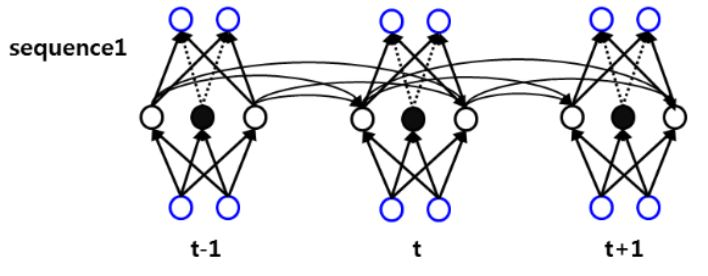

In [10]:
m4 = Sequential()
m4.add(LSTM(10, activation='tanh', input_shape=(3,1), recurrent_dropout=0.2))
m4.add(Dense(1))
m4.compile(optimizer='adam', loss='mse')
m4.fit(x, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 36.4742
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 36.0566
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 36.1597
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 35.5048
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 35.4249
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 35.2674
Epoch 7/100
1/1 [==============================] - 0s 924us/step - loss: 35.0012
Epoch 8/100
1/1 [==============================] - 0s 823us/step - loss: 34.6861
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 34.6951
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 34.4788
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 34.1327
Epoch 12/100
1/1 [==============================] - 0s 989us/step - loss: 34.0936
Epoch 13/100
1/1 [=========================

In [11]:
yhat = m4.predict(x_input)
yhat

array([[1.5623703]], dtype=float32)

- Batch Normalization for RNN

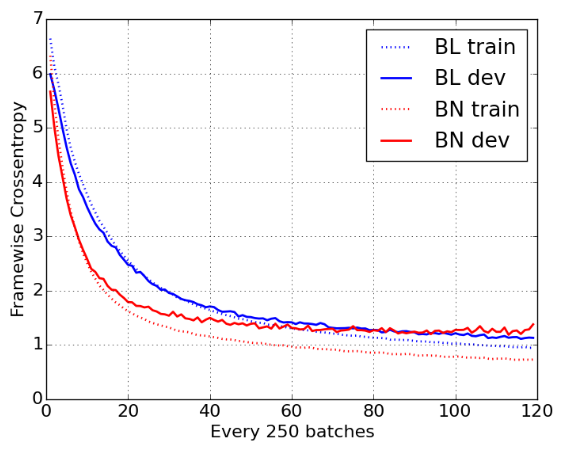

# 2. 영화 리뷰 감성분석
- konlpy 이용 
- cleaning, tokenize, encoding, modeling

In [12]:
# konlpy : 한국어 분석 nlp패키지
!pip install konlpy

In [13]:
import pandas as pd
import numpy as np

import urllib.request

from konlpy.tag import Okt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings('ignore')

In [14]:
# request로 data load
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7fc4a67f2780>)

In [15]:
train = pd.read_table('ratings_train.txt')
test = pd.read_table('ratings_test.txt')
# label : 1이면 긍정, 0이면 부정

In [16]:
train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


#### 1) data 정제(Cleaning)

In [17]:
# train 2만개, test 5천개만 사용
train = train[:20000]
test = test[:5000]

In [18]:
# train, test모두 중복 샘플이 존재함
print(train['document'].nunique(), test['document'].nunique()) 

19754 4969


In [19]:
# 중복 제거
train.drop_duplicates(subset=['document'], inplace=True)
test.drop_duplicates(subset=['document'], inplace=True)

# null 제거
train.dropna(inplace=True)
test.dropna(inplace=True)

In [20]:
print(train.shape, test.shape)

(19754, 3) (4969, 3)


In [21]:
# label 분포 확인 : 0,1 거의 동일함
train['label'].value_counts()

0    9935
1    9819
Name: label, dtype: int64

In [22]:
# 한글과 공백을 제외하고 모두 제거(정규표현식 이용)
train['document'] = train['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test['document'] = test['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [23]:
train.head()

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [24]:
# 한글로 바꾸면서 리뷰가 공백인 열이 많이 생김. 이러한 열을 제거해주기
train.query('document==""')

,id,document,label
584,7117896,,0
593,6478189,,0
638,9364602,,0
668,1600635,,0
1559,6918082,,1
...,...,...,...
18218,7309008,,1
18327,7481337,,0
19179,5151827,,1
19879,6804460,,0


In [25]:
# nan으로 반환 후 drop 해버리기
train['document'] = train['document'].apply(lambda x:np.nan if x=="" else x)
test['document'] = test['document'].apply(lambda x:np.nan if x=="" else x)

In [26]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [27]:
print(train.shape, test.shape)

(19693, 3) (4941, 3)


#### 2) 토큰화(Okt 이용)
- 불용어 제거(조사, 접속사 등)

In [28]:
# konlpy의 토큰화 : Okt() 
okt = Okt()
okt.morphs('아 배고프다 서브웨이 먹고싶다', stem=True) # stem=True : 일정 수준의 정규화

['아', '배고프다', '서브웨이', '먹다']

In [29]:
# 불용어 사전 : 계속 추가하기도 함
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [30]:
from tqdm import tqdm_notebook
X_train = []
for sentence in tqdm_notebook(train['document']):
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) 
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [31]:
X_test = []
for sentence in tqdm_notebook(test['document']):
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) 
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [32]:
train['token'] = X_train
test['token'] = X_test

In [33]:
train.head(3)

,id,document,label,token
0,9976970,아 더빙 진짜 짜증나네요 목소리,0,"[아, 더빙, 진짜, 짜증나다, 목소리]"
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1,"[흠, 포스터, 보고, 초딩, 영화, 줄, 오버, 연기, 조차, 가볍다, 않다]"
2,10265843,너무재밓었다그래서보는것을추천한다,0,"[너, 무재, 밓었, 다그, 래서, 보다, 추천, 다]"


#### 3) 인코딩

In [34]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [35]:
# 등장 빈도수가 높은 순서대로 index를 매긴다
# 높은 정수가 부여된 단어는 희소한 단어임
index = tokenizer.word_index
print(index)

{'영화': 1, '보다': 2, '을': 3, '없다': 4, '이다': 5, '있다': 6, '좋다': 7, '너무': 8, '다': 9, '정말': 10, '재밌다': 11, '만': 12, '적': 13, '되다': 14, '같다': 15, '진짜': 16, '아니다': 17, '로': 18, '점': 19, '않다': 20, '에서': 21, '만들다': 22, '나오다': 23, '연기': 24, '평점': 25, '것': 26, '최고': 27, '안': 28, '내': 29, '나': 30, '인': 31, '그': 32, '못': 33, '왜': 34, '스토리': 35, '보고': 36, '사람': 37, '생각': 38, '드라마': 39, '감동': 40, '이렇다': 41, '게': 42, '아깝다': 43, '고': 44, '말': 45, '때': 46, '감독': 47, '더': 48, '그냥': 49, 'ㅋㅋ': 50, '시간': 51, '거': 52, '아': 53, '재미': 54, '요': 55, '재미있다': 56, '배우': 57, '내용': 58, '까지': 59, '중': 60, '재미없다': 61, '하고': 62, '지루하다': 63, '자다': 64, '뭐': 65, '네': 66, '주다': 67, '모르다': 68, '쓰레기': 69, '가다': 70, '수': 71, '알다': 72, '들다': 73, '작품': 74, '싶다': 75, '하나': 76, '지': 77, '사랑': 78, '그렇다': 79, '정도': 80, '다시': 81, '볼': 82, '이건': 83, '이렇게': 84, '완전': 85, 'ㅠㅠ': 86, '마지막': 87, '저': 88, 'ㅋ': 89, '많다': 90, 'ㅋㅋㅋ': 91, '액션': 92, '개': 93, '주인공': 94, '최악': 95, '처음': 96, '차다': 97, '걸': 98, '느낌': 99, '오다': 100, '나다': 101, '돈': 10

In [36]:
len(index) # 사전의 단어는 17359개

17359

#### 4) 희소한 단어 제외

In [37]:
# 희소한 단어를 제외하자(3번 이하 등장한 단어 제외)
total = 0 # 전체 단어 빈도수 총 합
rare = 0
rare_sum = 0
for key, value in tokenizer.word_counts.items():
  total = total + value 

  if value < 3:
    rare = rare+1
    rare_sum = rare_sum + value

In [38]:
total # 전체 단어 빈도수

215061

In [39]:
rare # 등장 빈도 2번 이하인 단어 10901개

10901

In [40]:
rare_sum/total # rare 단어가 전체 단어 등장에서 차지하는 비율은 6.2%정도 밖에 되지않음. 
# 따라서 제외하고 사전을 다시 만든다. 

0.06270778988287044

In [41]:
v_size = len(index) - rare + 2 # 0패팅토큰과 1 OOV 고려해 +2
v_size # 단어 집합의 크기가 줄어듦. 

6460

In [42]:
tokenizer = Tokenizer(v_size, oov_token='OOV') # 그 외 단어는 OOV로 변환(정수 1번으로 할당)
tokenizer.fit_on_texts(X_train)

# text_to_sequence 이용
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [43]:
y_train = np.array(train['label'])
y_test = np.array(test['label'])

# 희소한 단어를 제거하며 빈 row들이 생겨남. 이들을 제거해줌
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

19640
19640


#### 5) 패딩
샘플의 길이를 동일하게 맞춰줌(LSTM에서는 꼭 필요)


In [44]:
train['len'] = train['token'].apply(len)
test['len'] = test['token'].apply(len)

# 희소 단어가 포함된 row는 아예 제거(현재 비어있음)
train = train.query('len!=0')
test = test.query('len!=0')

In [45]:
# 샘플 길이의 분포 파악
train['len'].describe(percentiles=[.25, .5, .75, .80,  .85, .95])

count    19640.000000
mean        10.950153
std          9.148893
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
80%         15.000000
85%         18.000000
95%         33.000000
max         64.000000
Name: len, dtype: float64

In [46]:
test['len'].describe(percentiles=[.25, .5, .75, .80,  .85, .95])

count    4923.000000
mean       10.652245
std         8.839724
min         1.000000
25%         5.000000
50%         8.000000
75%        13.000000
80%        14.000000
85%        17.000000
95%        32.000000
max        50.000000
Name: len, dtype: float64

In [47]:
# 95%정도가 30개의 인코딩 element를 가짐. 30개로 맞추기
# pad_sequences : 케라스에서 지원
X_train = pad_sequences(X_train, maxlen = 30, padding='pre')
X_test = pad_sequences(X_test, maxlen = 30, padding='pre')

In [48]:
X_train

array([[   0,    0,    0, ...,   17,  256,  770],
       [   0,    0,    0, ...,  937,  693,   21],
       [   0,    0,    0, ...,    3,  214,   10],
       ...,
       [   0,    0,    0, ...,  147,   35, 1190],
       [   0,    0,    0, ...,  365,  227,  921],
       [   0,    0,    0, ...,  506,  603,    1]], dtype=int32)

## Modeling
### 1) LSTM

In [49]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

model = Sequential()
model.add(Embedding(v_size, 100)) # 임베딩 차원 : 100차원
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         646000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 763,377
Trainable params: 763,377
Non-trainable params: 0
_________________________________________________________________


In [72]:
## callback
# val_loss 4회 증가시 종료
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=4) 

# val_acc가 이전보다 좋을때만 모델 저장
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode='max', verbose=1, save_best_only=True)

In [73]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.fit(X_train, y_train, epochs = 100, callbacks = [es, mc], batch_size = 60, validation_split=0.2)

Epoch 1/100
262/262 [==============================] - ETA: 0s - loss: 0.0578 - acc: 0.9789
Epoch 00001: val_acc improved from -inf to 0.76553, saving model to best_model.h5
262/262 [==============================] - 3s 10ms/step - loss: 0.0578 - acc: 0.9789 - val_loss: 1.8312 - val_acc: 0.7655
Epoch 2/100
260/262 [============================>.] - ETA: 0s - loss: 0.0549 - acc: 0.9779
Epoch 00002: val_acc improved from 0.76553 to 0.76706, saving model to best_model.h5
262/262 [==============================] - 3s 11ms/step - loss: 0.0548 - acc: 0.9780 - val_loss: 1.6877 - val_acc: 0.7671
Epoch 3/100
259/262 [============================>.] - ETA: 0s - loss: 0.0492 - acc: 0.9793
Epoch 00003: val_acc did not improve from 0.76706
262/262 [==============================] - 2s 9ms/step - loss: 0.0494 - acc: 0.9792 - val_loss: 1.7958 - val_acc: 0.7671
Epoch 4/100
261/262 [============================>.] - ETA: 0s - loss: 0.0506 - acc: 0.9798
Epoch 00004: val_acc improved from 0.76706 to 0.76

In [74]:
# test set 에서 79%의 정확도
model.evaluate(X_test, y_test)[1]

155/155 [==============================] - 0s 2ms/step - loss: 1.7176 - acc: 0.7721


0.7721108794212341

In [75]:
# 새로운 영화 감상평을 넣어보기
def new_pred(s):
  s = okt.morphs(s, stem=True) # 토큰화
  s = [word for word in s if not word in stopwords] 
  encoded = tokenizer.texts_to_sequences([s]) # 인코딩
  pad_new = pad_sequences(encoded, maxlen = 30) # 패딩
  score = float(model.predict(pad_new)) 

  if(score > 0.5):
    print("{:.2f}% 확률로 긍정리뷰임~!\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정리뷰임~\n".format((1 - score) * 100))

In [76]:
new_pred('아 ㅋㅋ 영화 재밌네')

97.94% 확률로 긍정리뷰임~!



In [77]:
new_pred('개노잼;; 이게 영화냐;;;')

99.99% 확률로 부정리뷰임~



In [78]:
new_pred('아;;; 그 돈으로 국밥을 사먹겠다')

82.27% 확률로 부정리뷰임~



In [84]:
new_pred('문성민같은 영화입니다.')

60.16% 확률로 부정리뷰임~



In [85]:
new_pred('이다은같은 영화입니다.')

53.83% 확률로 긍정리뷰임~!



### 2) 1D Conv

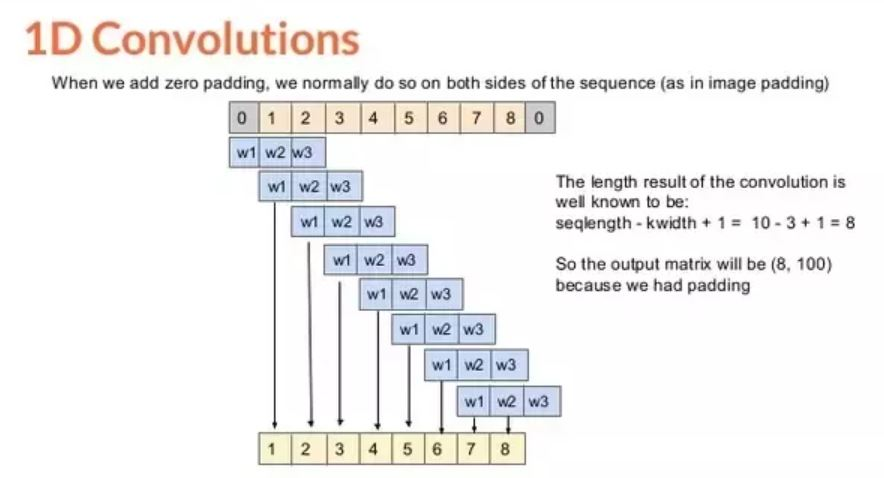

In [57]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [58]:
embedding_dim = 128
dropout_prob = (0.5, 0.8)
num_filters = 128

In [59]:
model_input = Input(shape = (30,))
z = Embedding(v_size, embedding_dim, input_length = 30, name="embedding")(model_input)
z = Dropout(dropout_prob[0])(z)

In [60]:
conv_blocks = []

# 3,4,5크기를 가지는 필터
for sz in [3, 4, 5]:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv = Flatten()(conv)
    conv_blocks.append(conv)

In [61]:
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_prob[1])(z)
z = Dense(128, activation="relu")(z)
model_output = Dense(1, activation="sigmoid")(z)

model = Model(model_input, model_output)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["acc"])

In [62]:
# callback
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('CNN_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size = 64, epochs=10, validation_split = 0.2, verbose=2, callbacks=[es, mc])

Epoch 1/10

Epoch 00001: val_acc improved from -inf to 0.79328, saving model to CNN_model.h5
246/246 - 3s - loss: 0.6219 - acc: 0.6207 - val_loss: 0.4459 - val_acc: 0.7933
Epoch 2/10

Epoch 00002: val_acc improved from 0.79328 to 0.81034, saving model to CNN_model.h5
246/246 - 2s - loss: 0.4104 - acc: 0.8171 - val_loss: 0.4177 - val_acc: 0.8103
Epoch 3/10

Epoch 00003: val_acc did not improve from 0.81034
246/246 - 2s - loss: 0.3391 - acc: 0.8546 - val_loss: 0.4303 - val_acc: 0.8080
Epoch 4/10

Epoch 00004: val_acc did not improve from 0.81034
246/246 - 2s - loss: 0.2947 - acc: 0.8798 - val_loss: 0.4436 - val_acc: 0.8047
Epoch 5/10

Epoch 00005: val_acc did not improve from 0.81034
246/246 - 2s - loss: 0.2570 - acc: 0.8958 - val_loss: 0.4806 - val_acc: 0.7971
Epoch 6/10

Epoch 00006: val_acc did not improve from 0.81034
246/246 - 2s - loss: 0.2284 - acc: 0.9088 - val_loss: 0.5294 - val_acc: 0.7984
Epoch 00006: early stopping


In [63]:
model.evaluate(X_test, y_test)[1]

155/155 [==============================] - 0s 2ms/step - loss: 0.4955 - acc: 0.8055


0.8055049777030945